# ANÁLISE DE GASTOS DE CANDIDATOS DE SP NA CAMPANHA DAS ELEIÇÕES DE 2018
PROF: ME FERNANDO MASANORI ASHIKAGA

ALUNOS:
Henrique Zucareli Santiago,
Leonardo Gabriel da Silva

OBJETIVO: A análise tem como objetivo avaliar os gastos de candidatos ao cargo de Governador do Estado de São Paulo nas eleições de 2018.

Fonte: https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2018.zip

Baixar dados trabalhados de: https://drive.google.com/file/d/1sdDHTMtGLF7TIIlCXFXMDKekiJssdMSf/view?usp=sharing

In [1]:
#Importando pandas
import pandas as pd

In [2]:
#Abrindo arquivo csv
data = pd.read_csv('sp_despesas_contratadas_2018.csv', encoding = 'Latin 1', sep = ';')

In [3]:
#Especificando o cabeçalho do arquivo
data = pd.read_csv('sp_despesas_contratadas_2018.csv', encoding = 'Latin 1', sep = ';', header = 0)

In [4]:
#Selecionando colunas
data = pd.read_csv('sp_despesas_contratadas_2018.csv', encoding = 'Latin 1', sep = ';', usecols = ['ST_TURNO','DS_CARGO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO','NR_PARTIDO', 'SG_PARTIDO','DS_DESPESA', 'VR_DESPESA_CONTRATADA'])

In [5]:
data.head()

,ST_TURNO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_DESPESA,VR_DESPESA_CONTRATADA
0,2,Governador,40,MARCIO LUIZ FRANÇA GOMES,4751068814,40,PSB,CONSULTORIA PROPAGANDA E MARKETING,1500000.00
1,1,Senador,123,ANTONIO FERNANDES DOS SANTOS NETO,61044580844,12,PDT,ASSESSORIA DE IMPRENSA,11666.67
2,1,Deputado Estadual,65123,GUSTAVO LEMOS PETTA,22120219842,65,PC do B,DISTRIBUIÇÃO DE PANFLETOS,5000.00
3,1,Deputado Federal,4550,PEDRO MOTOITIRO KAWAI,11006628800,45,PSDB,SERVIÇO DE PANFLETAGEM,3500.00
4,1,Deputado Federal,1045,EDUARDO JANZON AVALLONE NOGUEIRA,13520788802,10,PRB,DISTRIBUIÇÃO DE 130 MIL PANFLETOS EM BAURU,14017.50


In [6]:
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

Gasto total da eleição

In [7]:
gasto_total = round(data.VR_DESPESA_CONTRATADA.sum(),2)
print('O valor total gasto de todos os candidatos à cargos pelo Estado de SP foi: R$', gasto_total)


O valor total gasto de todos os candidatos à cargos pelo Estado de SP foi: R$ 422563870.16


Gasto total dos candidatos a Governador

In [8]:
gasto_candidatos = data[data["DS_CARGO"] == "Governador"]["VR_DESPESA_CONTRATADA"].sum()
print('Soma dos gastos totais dos candidatos a Governador do Estado de SP: R$', round(gasto_candidatos,2))

Soma dos gastos totais dos candidatos a Governador do Estado de SP: R$ 54241893.0


Percentual de todas as despesas x total de gastos de candidatos a Governador

In [9]:
percentual_governadores = (gasto_candidatos / gasto_total) * 100
print('O gasto de candidatos a governador representou', round(percentual_governadores, 2), '% do total dos gastos das eleições de 2018 em SP')

O gasto de candidatos a governador representou 12.84 % do total dos gastos das eleições de 2018 em SP


Nomes e valores gastos por candidato a Governador

In [10]:
governadores_primeiro_turno = data[(data["DS_CARGO"] == "Governador")]
governadores_primeiro_turno.groupby('NM_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum()

NM_CANDIDATO
ADRIANO DA COSTA E SILVA                   6074.15
ANTONIO DONIZETE FERREIRA                 80210.50
CLAUDIO FERNANDO DE AGUIAR                27955.00
JOÃO AGRIPINO DA COSTA DORIA JUNIOR    22135193.23
LISETE REGINA GOMES ARELARO              171947.05
LUIZ MARINHO                            5915459.53
MARCELO CANDIDO                         1979862.48
MARCIO LUIZ FRANÇA GOMES               11755514.33
PAULO ANTONIO SKAF                     10608878.64
RODRIGO TAVARES DA SILVA                 123678.71
ROGERIO CHEQUER RAMALHO MACHADO         1437119.38
Name: VR_DESPESA_CONTRATADA, dtype: float64

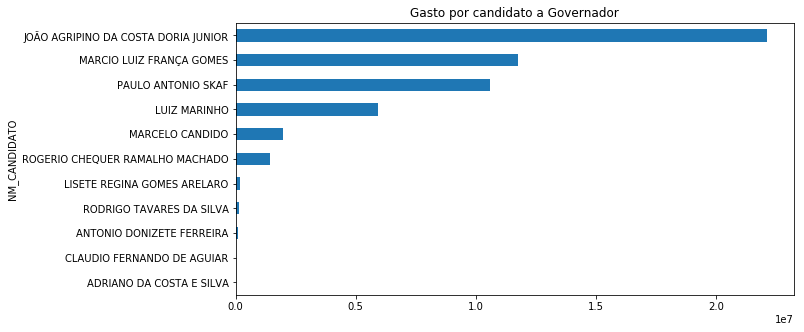

In [11]:
governadores_primeiro_turno.groupby('NM_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum().sort_values().tail(13).plot(title='Gasto por candidato a Governador', kind='barh', figsize=(10,5))

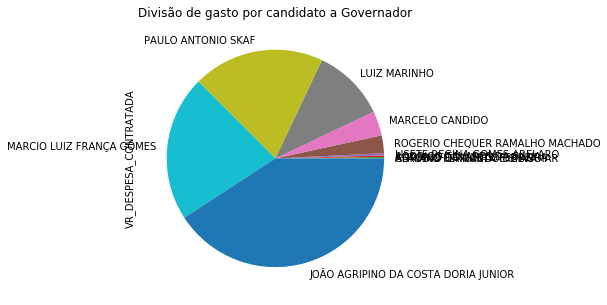

In [12]:
governadores_primeiro_turno.groupby('NM_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum().sort_values().tail(11).plot(title='Divisão de gasto por candidato a Governador', kind='pie', figsize=(10,5))

Como pode ser observado,o candidato eleito João Doria foi o que mais gastou na campanha eleitoral de 2018

In [13]:
gasto_doria = data[data["NR_CANDIDATO"] == 45]["VR_DESPESA_CONTRATADA"].sum()
percentual_doria_governadores = (gasto_doria / gasto_candidatos) * 100
percentual_doria_eleicoes = (gasto_doria / gasto_total) * 100

print('O gasto total de João Doria foi: R$', round(gasto_doria,2), '\nEsses gastos representaram:\n', round(percentual_doria_governadores,2),'% dos gastos dos governadores\n', round(percentual_doria_eleicoes,2), '% dos gastos das eleições')

O gasto total de João Doria foi: R$ 22135193.23 
Esses gastos representaram:
 40.81 % dos gastos dos governadores
 5.24 % dos gastos das eleições


Maiores despesas declaradas

In [14]:
descricao_gastos_total = data[(data["DS_CARGO"] == "Governador")]
descricao_gastos_total.groupby('DS_DESPESA')['VR_DESPESA_CONTRATADA'].sum().sort_values()

DS_DESPESA
TAXA DEV DOCUMENTO                                          0.35
TAXA SOBRE DEVOLUÇÃO DE CHEQUE                              0.35
TARIFA DEVOLUÇÃO                                            0.35
TARIFA DE TR TEV IBC                                        1.00
TR TEV IBC                                                  1.00
                                                         ...    
PAGTO REF. SERVS DE CAMPANHA CF. CONTRATO             1200000.00
PROD AUDIOVISUAL·COMERCIAIS·ASSEM.-NF 92/93/94/99     1239100.00
CONSULTORIA PROPAGANDA E MARKETING                    1500000.00
PRESTACAO DE SERVICO PARA CAMPANHA ELEITORAL          1900000.00
PAGAMENTO REF. ELAB.DE FILMES PUBLICITARIO CF.CONT    5400000.00
Name: VR_DESPESA_CONTRATADA, Length: 1531, dtype: float64

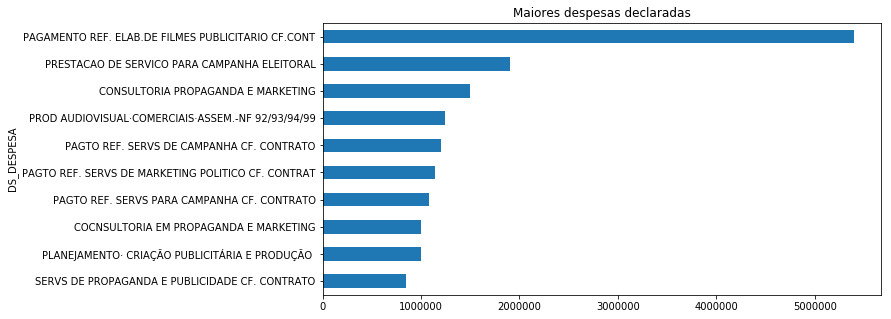

In [15]:
descricao_gastos_total.groupby('DS_DESPESA')['VR_DESPESA_CONTRATADA'].sum().sort_values().tail(10).plot(title='Maiores despesas declaradas', kind='barh', figsize=(10,5))